In [1]:
import sys
sys.path.append('../../')

In [2]:
import os
import warnings

import numpy as np
import pandas

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from soma.generators.normal import MultivariateNormalGenerator
from soma.util.plot import plot_sample_and_dim

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (4.77, 4.77),
    'text.usetex': True,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'lines.linewidth': 0.5,
    'errorbar.capsize': 1,
    'lines.markeredgewidth': 0.8
})

In [3]:
plot_dir = os.path.expanduser('~/Plots/by_dataset')
os.makedirs(plot_dir, exist_ok=True)

# Normal location

In [4]:
means = np.zeros(1000)
means2 = np.ones(1000)
repeat = 200

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [5]:
#normal_sample = stat_errors_vs_sample_size(n1, n2, tests, samples, repeat=repeat)
#normal_sample.to_csv('../../results/sample_size/normal_results_samples.csv')
normal_sample = pandas.read_csv('../../results/sample_size/normal_results_samples.csv', index_col=[0, 1])

In [6]:
#normal_dim = stat_errors_vs_dimension(n2, n1, tests, alpha=significance, samples=samples, repeat=repeat,
#                                              step=100, reducer=SliceGenerator)
#normal_dim.to_csv('../results/dimensionality/normal_results_dim.csv')
normal_dim = pandas.read_csv('../../results/dimensionality/normal_results_dim.csv', index_col=[0, 1])

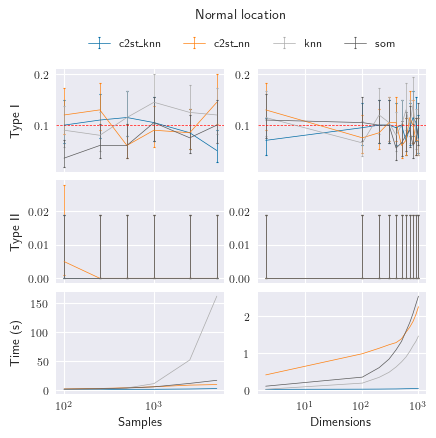

In [7]:
fig = plot_sample_and_dim(normal_sample, normal_dim, title='Normal location', n=repeat)
fig.savefig(os.path.join(plot_dir, 'normal_location.pdf'))

# Normal location (fair)

In [8]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [9]:
#n3_samples = stat_errors_vs_sample_size(n3, n1, tests, samples, repeat=repeat)
#n3_samples.to_csv('../../results/sample_size/n3_results_samples.csv')
n3_samples = pandas.read_csv('../../results/sample_size/n3_results_samples.csv', index_col=[0,1])

In [10]:
#n3_dim = stat_errors_vs_dimension(n3, n1, tests, alpha=significance, samples=samples, repeat=repeat, step=100, reducer=SliceGenerator)
#n3_dim.to_csv('../../results/dimensionality/normal_fair_dim.csv')
n3_dim = pandas.read_csv('../../results/dimensionality/normal_fair_dim.csv', index_col=[0, 1])

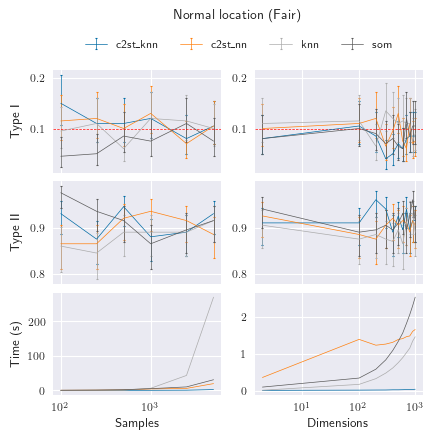

In [11]:
fig = plot_sample_and_dim(n3_samples, n3_dim, title='Normal location (Fair)', n=repeat)
fig.savefig(os.path.join(plot_dir, 'normal_location_fair.pdf'))

# Normal (scale)

In [12]:
ns1 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)

In [13]:
#ns_sample = stat_errors_vs_sample_size(ns1, ns2, tests, samples, repeat=repeat)
#ns_sample.to_csv(os.path.join(plot_dir, 'ns_results_samples.csv'))
ns_sample = pandas.read_csv('../../results/sample_size/ns_results_samples.csv', index_col=[0, 1])

In [14]:
#ns_dim = stat_errors_vs_dimension(ns1, ns2, tests, alpha=significance, samples=samples, repeat=repeat, step=100, reducer=SliceGenerator)
#ns_dim.to_csv('../results/dimensionality/normal_scale_dim.csv')
ns_dim = pandas.read_csv('../../results/dimensionality/normal_scale_dim.csv', index_col=[0, 1])

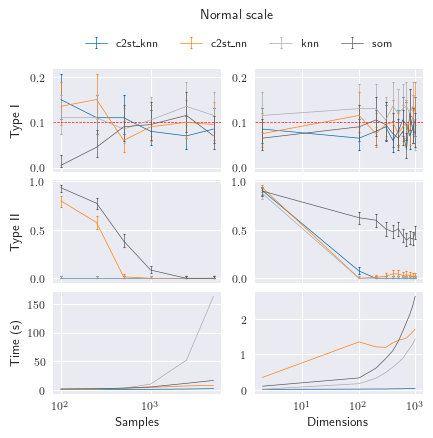

In [15]:
fig = plot_sample_and_dim(ns_sample, ns_dim, title='Normal scale', n=repeat)
fig.savefig(os.path.join(plot_dir, 'normal_scale.pdf'))

# Normal scale (fair)

In [16]:
nsf1_cov = np.identity(len(means))
nsf2_cov = np.identity(len(means))
nsf1_cov[0, 0] = 4.

nsf1 = MultivariateNormalGenerator(means, cov=nsf1_cov)
nsf2 = MultivariateNormalGenerator(means, cov=nsf2_cov)

In [17]:
#nsf_samples = stat_errors_vs_sample_size(nsf1, nsf2, tests, samples, repeat=repeat)
#nsf_samples.to_csv('../../results/sample_size/nsf_results_samples.csv')
nsf_samples = pandas.read_csv('../../results/sample_size/nsf_results_samples.csv', index_col=[0, 1])

In [18]:
#nsf_dim = stat_errors_vs_dimension(nsf1, nsf2, tests, alpha=significance, samples=samples, repeat=repeat, step=100,
#                                       reducer=SliceGenerator)
#nsf_dim.to_csv('../results/dimensionality/normal_scale_fair_dim.csv')
nsf_dim = pandas.read_csv('../../results/dimensionality/normal_scale_fair_dim.csv', index_col=[0, 1])

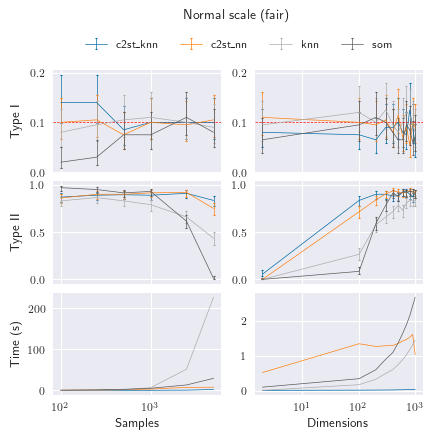

In [19]:
fig = plot_sample_and_dim(nsf_samples, nsf_dim, title='Normal scale (fair)', n=repeat)
fig.savefig(os.path.join(plot_dir, 'normal_scale_fair.pdf'))